In [1]:
import pandas as pd

import seaborn as sns

import cv2
import matplotlib.pyplot as plt
import numpy as np
import sys
import math
from pathlib import Path

# UMAP

In [23]:
# Load test embedding

Umap = pd.read_feather(
    "/mnt/upramdya_data/MD/Ballpushing_Exploration/Datasets/250305_StdContacts_Ctrl_noOverlap_Data/UMAP/240305_UMAPpooled_FeedingState_TrackingOnly.feather"
)

In [24]:
Umap.head()

,UMAP1,UMAP2,duration,fly,event_type,start,end,start_frame,end_frame,x_Head_fly_vel_mean,...,Nickname,Brain region,Date,Genotype,Period,FeedingState,Orientation,Light,Crossing,event_id
0,9.317579,2.963882,100,230704_FeedingState_1_AM_Videos_Tracked_arena1...,random,818.758621,822.172414,23744,23843,0.000000e+00,...,PR,Control,230704,PR,AM,starved_noWater,std,on,None,0
1,8.663825,3.374988,100,230704_FeedingState_1_AM_Videos_Tracked_arena1...,random,2897.172414,2900.586207,84018,84117,0.000000e+00,...,PR,Control,230704,PR,AM,starved_noWater,std,on,None,11
2,4.926712,-4.812471,100,230704_FeedingState_1_AM_Videos_Tracked_arena1...,random,2112.482759,2115.896552,61262,61361,5.607187e-19,...,PR,Control,230704,PR,AM,starved_noWater,std,on,None,3
3,-3.752244,9.325210,100,230704_FeedingState_1_AM_Videos_Tracked_arena1...,interaction,461.655172,465.068966,13388,13487,5.607187e-19,...,PR,Control,230704,PR,AM,starved_noWater,std,on,None,7
4,5.807932,1.799820,100,230704_FeedingState_1_AM_Videos_Tracked_arena1...,random,2301.068966,2304.482759,66731,66830,4.485750e-18,...,PR,Control,230704,PR,AM,starved_noWater,std,on,None,5


In [25]:
# Define and create if not exist output directory

output_dir = Path("/mnt/upramdya_data/MD/Ballpushing_Exploration/Behavior_classification/UMAP/250305_Pooled_extrafeatures_noOverlap_TrackingOnly")

output_dir.mkdir(parents=True, exist_ok=True)

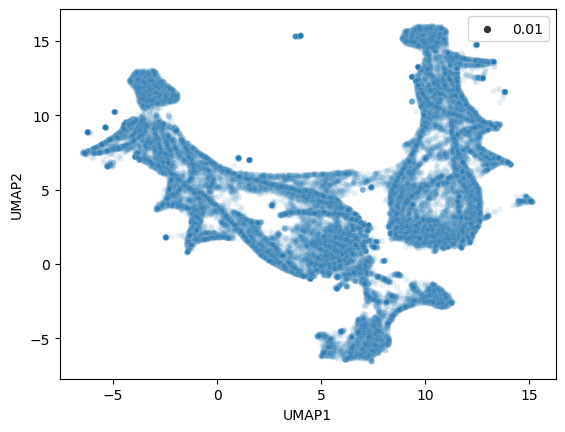

In [26]:
# Scatter plot of UMAP1 vs UMAP2

sns.scatterplot(data=Umap, x="UMAP1", y="UMAP2", size=0.01, alpha = 0.1)

# save the plot

plt.savefig(f"{output_dir}/UMAPTest.png")


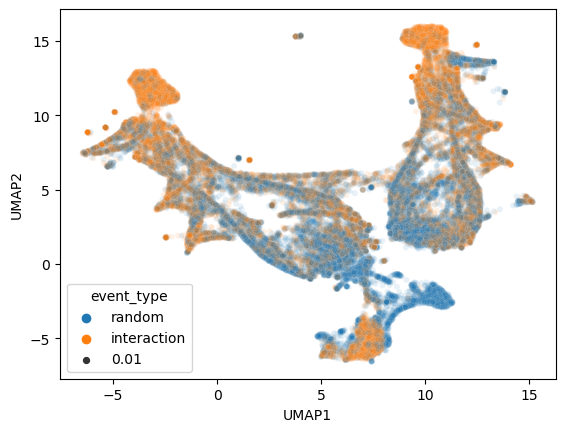

In [27]:
# Color code by event_type

sns.scatterplot(data=Umap, x="UMAP1", y="UMAP2", size=0.01, alpha = 0.1, hue="event_type")

# Save the plot

plt.savefig(f"{output_dir}/UMAP_event_types.png")

/home/matthias/miniconda3/envs/trackinganalysis/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/matthias/miniconda3/envs/trackinganalysis/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/matthias/miniconda3/envs/trackinganalysis/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/matthias/miniconda3/envs/trackinganalysis/lib/python3.11/site-packages/seaborn/_oldcore.py:111

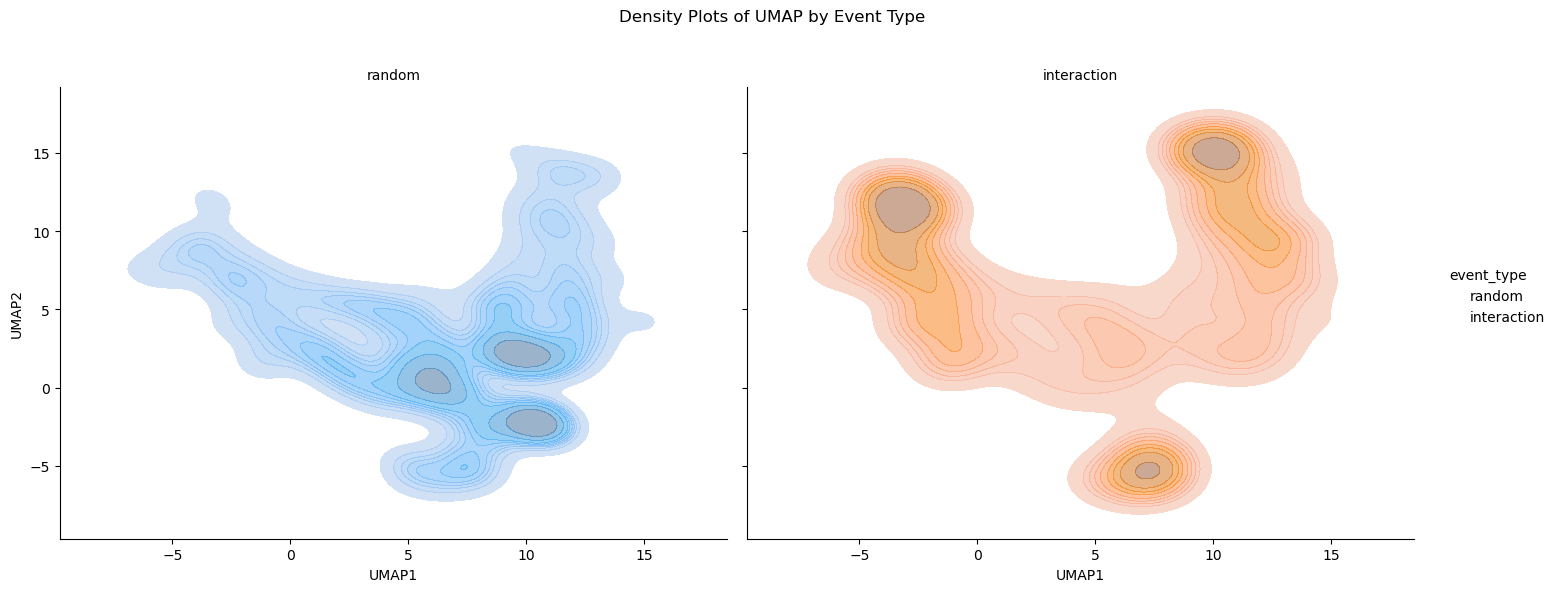

In [28]:
# Create a FacetGrid with two columns, one for each event_type
g = sns.FacetGrid(Umap, col="event_type", hue="event_type", sharex=True, sharey=True, height=6, aspect=1.2)

# Map the kdeplot to the FacetGrid
g.map(sns.kdeplot, "UMAP1", "UMAP2", fill=True, alpha=0.5)

# Add titles and adjust layout
g.set_titles(col_template="{col_name}")
g.add_legend()
plt.subplots_adjust(top=0.85)
g.fig.suptitle("Density Plots of UMAP by Event Type")

# Save the plot
plt.savefig(f"{output_dir}/UMAP_event_types_density.png")
plt.show()
plt.close()

# Clustering

In [32]:
# Identify clusters based on KMeans

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=12, random_state=0).fit(Umap[["UMAP1", "UMAP2"]])

Umap["cluster"] = kmeans.labels_


In [33]:
Umap["cluster"].unique()

array([ 0,  4,  1,  5,  9,  7, 10,  6, 11,  3,  8,  2], dtype=int32)

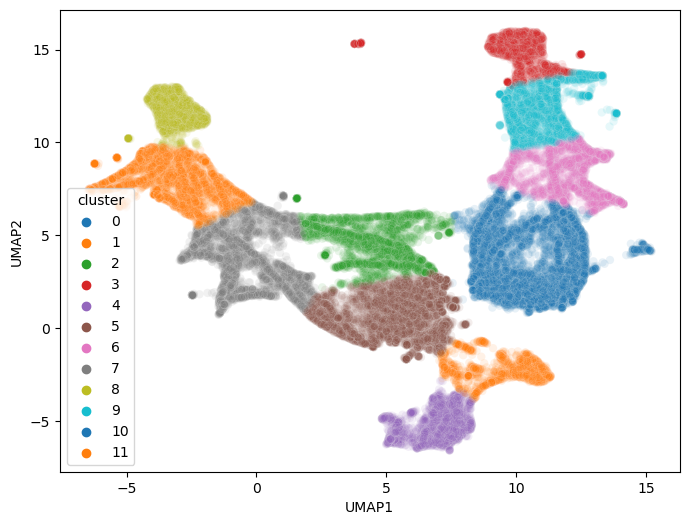

In [34]:

plt.figure(figsize=(8, 6))

sns.scatterplot(data=Umap, x="UMAP1", y="UMAP2", alpha = 0.1, hue="cluster", palette="tab10")

# Save the plot

plt.savefig(f"{output_dir}/UMAP_Clusters.png")

/home/matthias/miniconda3/envs/trackinganalysis/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/matthias/miniconda3/envs/trackinganalysis/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/matthias/miniconda3/envs/trackinganalysis/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/matthias/miniconda3/envs/trackinganalysis/lib/p

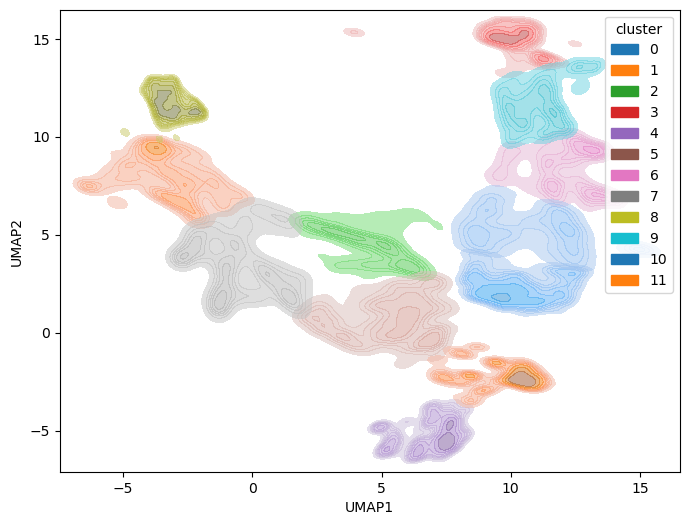

In [35]:
# Same with density

plt.figure(figsize=(8, 6))

sns.kdeplot(data=Umap, x="UMAP1", y="UMAP2", fill=True, alpha=0.5, hue="cluster", palette="tab10")

plt.savefig(f"{output_dir}/UMAP_Clusters_density.png")

In [11]:
# Get columns that do not have "centre" in their name

Umap.columns[~Umap.columns.str.contains("centre")]

Index(['UMAP1', 'UMAP2', 'duration', 'start', 'Thorax_frame2_angular_velocity',
       'Thorax_frame3_angular_velocity', 'Thorax_frame4_angular_velocity',
       'Thorax_frame5_angular_velocity', 'Thorax_frame6_angular_velocity',
       'Thorax_frame7_angular_velocity',
       ...
       'Brain region', 'Date', 'Genotype', 'Period', 'FeedingState',
       'Orientation', 'Light', 'Crossing', 'event_id', 'cluster'],
      dtype='object', length=437)

# Looking into particular conditions

## Light

In [47]:
# Check Light values: 

Umap["Light"].unique()

# Check how many values for each light level

Umap["Light"].value_counts()

Light
on     40212
off    19402
        3398
Name: count, dtype: int64

In [48]:
# Make a subset of the data with only "on" and "off" light values

Umap_light = Umap[Umap["Light"].isin(["off", "on"])]



<Axes: xlabel='UMAP1', ylabel='UMAP2'>

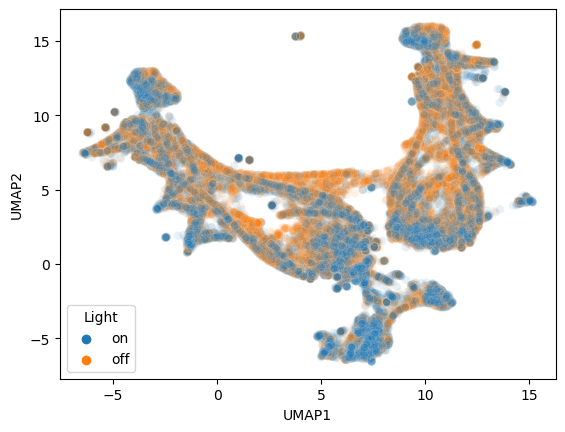

In [49]:
sns.scatterplot(
    data=Umap_light, x="UMAP1", y="UMAP2", alpha=0.1, hue="Light", palette="tab10"
)

/home/matthias/miniconda3/envs/trackinganalysis/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/matthias/miniconda3/envs/trackinganalysis/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/matthias/miniconda3/envs/trackinganalysis/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/matthias/miniconda3/envs/trackinganalysis/lib/python3.11/site-packages/seaborn/_oldcore.py:111

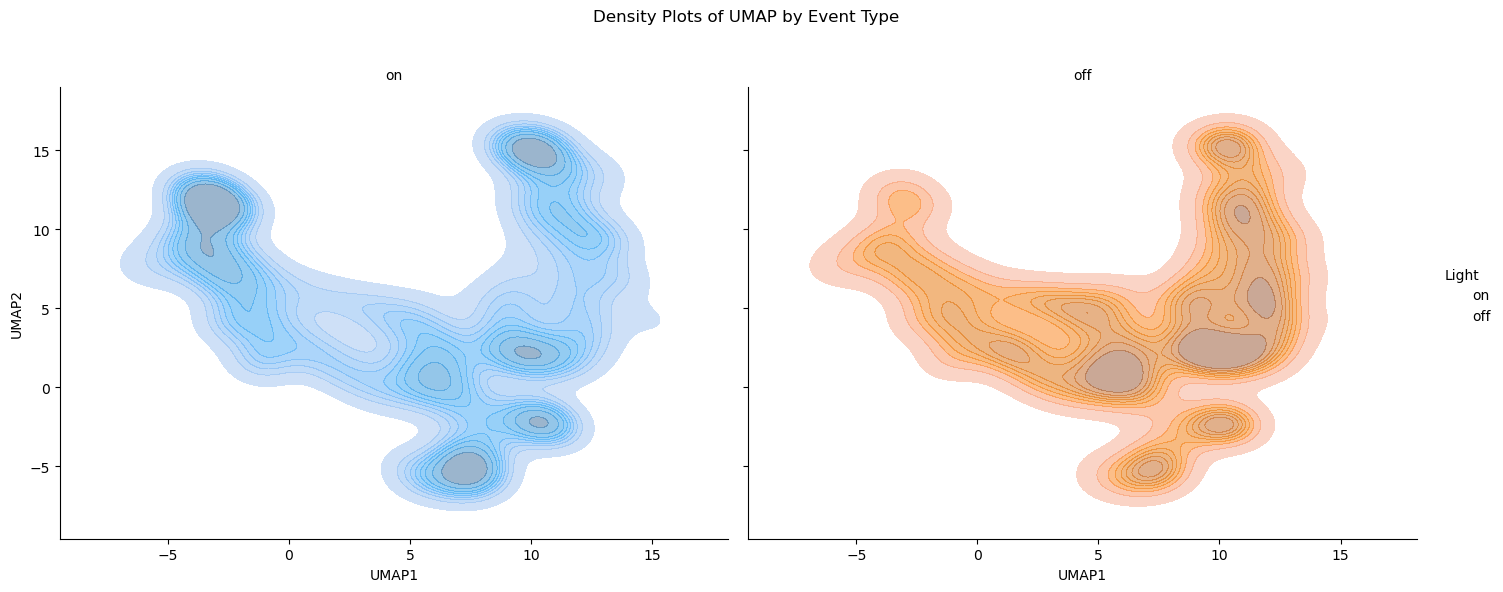

In [50]:
# Create a FacetGrid with two columns, one for each event_type
g = sns.FacetGrid(
    Umap_light, col="Light", hue="Light", sharex=True, sharey=True, height=6, aspect=1.2
)

# Map the kdeplot to the FacetGrid
g.map(sns.kdeplot, "UMAP1", "UMAP2", fill=True, alpha=0.5)

# Add titles and adjust layout
g.set_titles(col_template="{col_name}")
g.add_legend()
plt.subplots_adjust(top=0.85)
g.fig.suptitle("Density Plots of UMAP by Event Type")

# Save the plot
plt.savefig(f"{output_dir}/UMAP_LightConditions_Density.png")
plt.show()
plt.close()

## Feeding State

In [54]:
# Check FeedingState values:

Umap["FeedingState"].unique()

# Check how many values for each light level

Umap["FeedingState"].value_counts()

FeedingState
starved            21572
starved_noWater    19016
fed                14382
Fed                 4644
                    3398
Name: count, dtype: int64

In [55]:
# Rename the feedingstate that are "Fed" to "fed" and make a subset of the data with only "starved", "fed" and "starved_noWater"

Umap["FeedingState"] = Umap["FeedingState"].replace("Fed", "fed")

Umap_feeding = Umap[Umap["FeedingState"].isin(["starved", "fed", "starved_noWater"])]
Umap_feeding["FeedingState"].unique()

array(['starved_noWater', 'starved', 'fed'], dtype=object)

/home/matthias/miniconda3/envs/trackinganalysis/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/matthias/miniconda3/envs/trackinganalysis/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/matthias/miniconda3/envs/trackinganalysis/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/matthias/miniconda3/envs/trackinganalysis/lib/python3.11/site-packages/seaborn/_oldcore.py:111

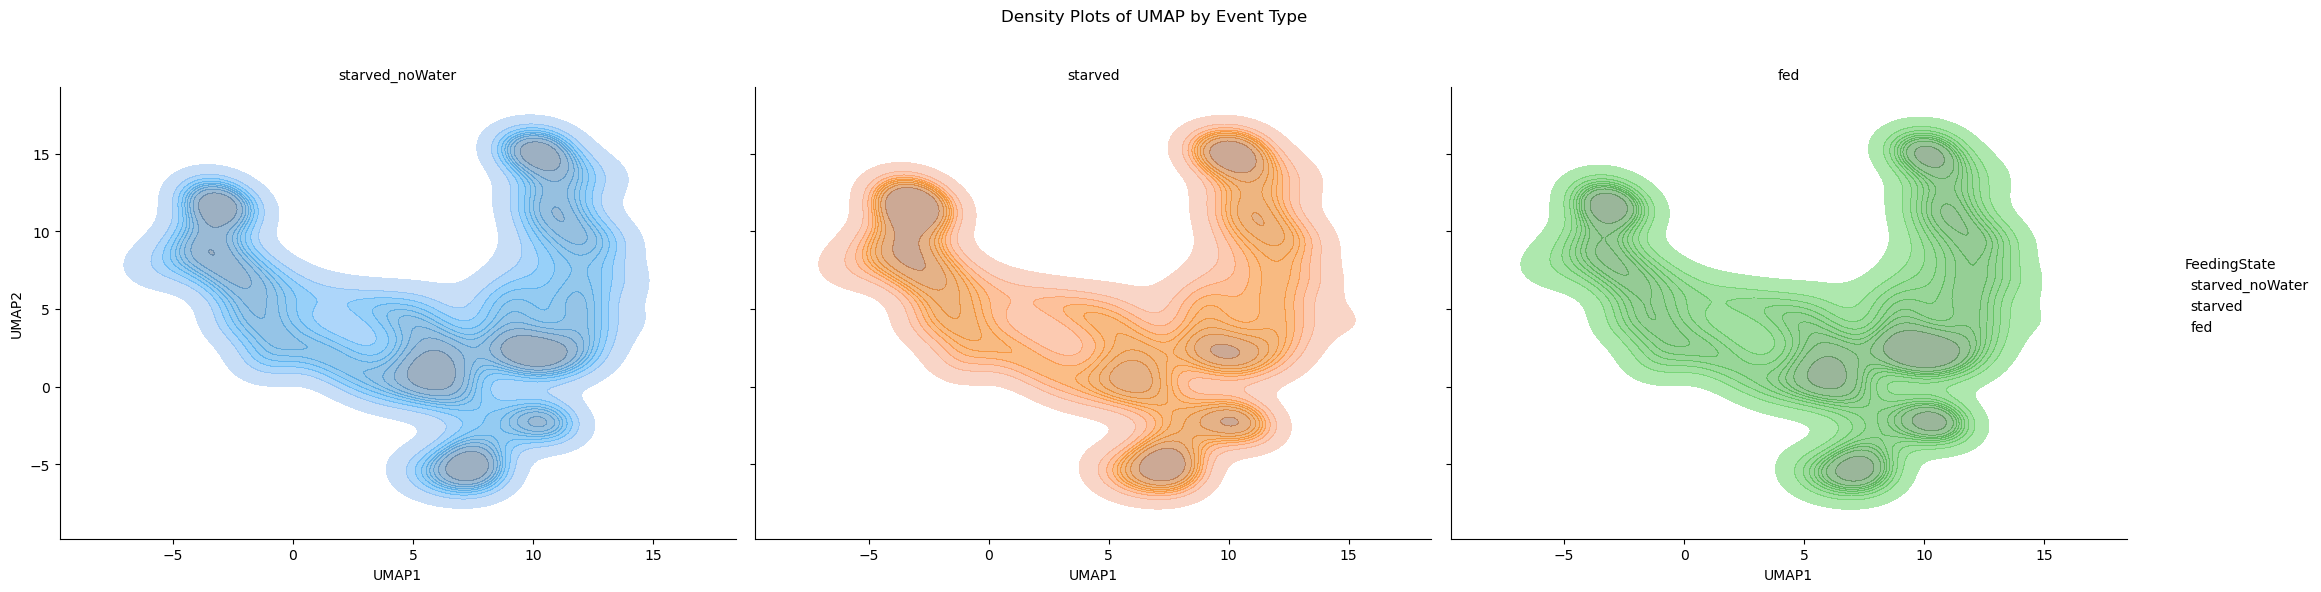

In [57]:
# Create a FacetGrid with two columns, one for each event_type
g = sns.FacetGrid(
    Umap_feeding,
    col="FeedingState",
    hue="FeedingState",
    sharex=True,
    sharey=True,
    height=6,
    aspect=1.2,
)

# Map the kdeplot to the FacetGrid
g.map(sns.kdeplot, "UMAP1", "UMAP2", fill=True, alpha=0.5)

# Add titles and adjust layout
g.set_titles(col_template="{col_name}")
g.add_legend()
plt.subplots_adjust(top=0.85)
g.fig.suptitle("Density Plots of UMAP by Event Type")

# Save the plot
plt.savefig(f"{output_dir}/UMAP_FeedingStateConditions_Density.png")
plt.show()
plt.close()

In [2]:
# Load the source data

interaction_data = pd.read_feather(
    "/mnt/upramdya_data/MD/Ballpushing_Exploration/Datasets/250305_StdContacts_Ctrl_noOverlap_Data/standardized_contacts/250305_pooled_standardized_contacts.feather"
)

In [3]:
interaction_data.head()

,index,frame,time,object,x_Head,y_Head,x_Thorax,y_Thorax,x_Abdomen,y_Abdomen,...,Genotype,Period,FeedingState,Orientation,Light,Crossing,BallType,Peak,Used_to,Magnet
0,0,1071,36.931034,fly_1,75.710632,240.353424,75.440628,251.809906,67.591927,264.505920,...,PR,PM,fed,std,off,None,None,NaN,NaN,NaN
1,1,1072,36.965517,fly_1,75.812958,240.381378,75.516953,251.901382,67.485046,267.341705,...,PR,PM,fed,std,off,None,None,NaN,NaN,NaN
2,2,1073,37.000000,fly_1,75.792000,240.267883,75.472809,251.762573,64.422112,264.439514,...,PR,PM,fed,std,off,None,None,NaN,NaN,NaN
3,3,1074,37.034483,fly_1,75.984436,240.330215,75.542435,251.807129,64.420174,264.344635,...,PR,PM,fed,std,off,None,None,NaN,NaN,NaN
4,4,1075,37.068966,fly_1,76.052086,240.229660,75.573708,251.706802,64.398346,264.272858,...,PR,PM,fed,std,off,None,None,NaN,NaN,NaN


In [4]:
interaction_data.columns

Index(['index', 'frame', 'time', 'object', 'x_Head', 'y_Head', 'x_Thorax',
       'y_Thorax', 'x_Abdomen', 'y_Abdomen', 'x_Rfront', 'y_Rfront',
       'x_Lfront', 'y_Lfront', 'x_Rmid', 'y_Rmid', 'x_Lmid', 'y_Lmid',
       'x_Rhind', 'y_Rhind', 'x_Lhind', 'y_Lhind', 'x_Rwing', 'y_Rwing',
       'x_Lwing', 'y_Lwing', 'x_centre_preprocessed', 'y_centre_preprocessed',
       'x_Head_fly', 'y_Head_fly', 'x_Thorax_fly', 'y_Thorax_fly',
       'x_Abdomen_fly', 'y_Abdomen_fly', 'x_Rfront_fly', 'y_Rfront_fly',
       'x_Lfront_fly', 'y_Lfront_fly', 'x_Rmid_fly', 'y_Rmid_fly',
       'x_Lmid_fly', 'y_Lmid_fly', 'x_Rhind_fly', 'y_Rhind_fly', 'x_Lhind_fly',
       'y_Lhind_fly', 'x_Rwing_fly', 'y_Rwing_fly', 'x_Lwing_fly',
       'y_Lwing_fly', 'x_centre_preprocessed_fly', 'y_centre_preprocessed_fly',
       'event_id', 'time_rel_onset', 'fly_idx', 'ball_idx', 'adjusted_frame',
       'event_type', 'ball_displacement', 'fly', 'flypath', 'experiment',
       'Nickname', 'Brain region', 'Simplified 

In [41]:
# Make a unique identifier as combination of fly, event_type and event_id

Umap["unique_id"] = Umap["fly"].astype(str) + "_" + Umap["event_type"] + "_" + Umap["event_id"].astype(str)

interaction_data["unique_id"] = interaction_data["fly"].astype(str) + "_" + interaction_data["event_type"] + "_" + interaction_data["event_id"].astype(str)

In [42]:
# As example get the cluster 0 and make a subset of interaction data that contains all unique_ids in cluster 0

cluster_0 = Umap[Umap["cluster"] == 0]

cluster_0_interactions = interaction_data[interaction_data["unique_id"].isin(cluster_0["unique_id"])]
cluster_0_interactions.head()

,index,frame,time,object,x_Head,y_Head,x_Thorax,y_Thorax,x_Abdomen,y_Abdomen,...,Period,FeedingState,Orientation,Light,Crossing,BallType,Peak,Used_to,Magnet,unique_id
300,300,136824,4718.068966,fly_1,44.345085,348.276489,55.856445,355.852997,68.292175,364.468781,...,PM,fed,std,off,None,None,NaN,NaN,NaN,230725_FeedingState_PM_Dark_Videos_Tracked_are...
301,301,136825,4718.103448,fly_1,44.136154,351.525879,55.539948,356.032684,68.067123,367.554810,...,PM,fed,std,off,None,None,NaN,NaN,NaN,230725_FeedingState_PM_Dark_Videos_Tracked_are...
302,302,136826,4718.137931,fly_1,44.219486,352.127655,55.699768,359.427094,68.398140,367.911377,...,PM,fed,std,off,None,None,NaN,NaN,NaN,230725_FeedingState_PM_Dark_Videos_Tracked_are...
303,303,136827,4718.172414,fly_1,44.150551,351.890228,55.481010,359.371765,68.159004,367.736481,...,PM,fed,std,off,None,None,NaN,NaN,NaN,230725_FeedingState_PM_Dark_Videos_Tracked_are...
304,304,136828,4718.206897,fly_1,44.524418,352.085388,55.806175,359.530975,71.368515,367.708557,...,PM,fed,std,off,None,None,NaN,NaN,NaN,230725_FeedingState_PM_Dark_Videos_Tracked_are...


# Looping over all clusters

In [43]:
# Configuration parameters
MAX_CELL_WIDTH = 96   # Maximum width for grid cells
MAX_CELL_HEIGHT = 516  # Maximum height for grid cells
MAX_OUTPUT_WIDTH = 3840
MAX_OUTPUT_HEIGHT = 2160
FPS = 5
CODEC = "mp4v"
OUTPUT_DIR = output_dir

def resize_with_padding(frame, target_w, target_h):
    """Resize frame while maintaining aspect ratio with padding"""
    h, w = frame.shape[:2]
    scale = min(target_w/w, target_h/h)
    new_w = int(w * scale)
    new_h = int(h * scale)
    
    resized = cv2.resize(frame, (new_w, new_h))
    pad_w = target_w - new_w
    pad_h = target_h - new_h
    
    # Add equal padding on both sides
    top = pad_h // 2
    bottom = pad_h - top
    left = pad_w // 2
    right = pad_w - left
    
    return cv2.copyMakeBorder(resized, top, bottom, left, right, 
                            cv2.BORDER_CONSTANT, value=(0,0,0))

def process_cluster(cluster_id, Umap, interaction_data):
    cluster_data = Umap[Umap["cluster"] == cluster_id]
    cluster_interactions = interaction_data[interaction_data["unique_id"].isin(cluster_data["unique_id"])]
    
    # Calculate frame ranges for each unique_id
    frame_ranges = (cluster_interactions
                    .groupby('unique_id')['frame']
                    .agg(frame_start=('min'), frame_end=('max'))
                    .reset_index())

    # Merge with path information
    event_metadata = (cluster_interactions[['unique_id', 'flypath']]
                      .drop_duplicates()
                      .merge(frame_ranges, on='unique_id'))

    # Calculate grid layout based on max output dimensions
    cols = MAX_OUTPUT_WIDTH // MAX_CELL_HEIGHT  # Note the swapped dimensions
    rows = MAX_OUTPUT_HEIGHT // MAX_CELL_WIDTH  # Note the swapped dimensions
    max_events = cols * rows

    # Sample events if needed
    if len(event_metadata) > max_events:
        event_metadata = event_metadata.sample(max_events, random_state=42)

    # Initialize frame storage and video metadata
    frames_dict = {}
    max_duration = 0
    valid_events = 0

    # Process videos in optimized groups
    for flypath, group in event_metadata.groupby('flypath'):
        video_files = list(Path(flypath).glob("*.mp4"))
        video_file = next((vf for vf in video_files if "_preprocessed" not in vf.stem), None)
        
        if not video_file:
            print(f"Skipping {flypath} - no suitable MP4 found")
            continue

        cap = cv2.VideoCapture(str(video_file))
        if not cap.isOpened():
            print(f"Couldn't open {video_file}")
            continue

        # Process all events from this video
        for _, event in group.iterrows():
            try:
                start = int(event['frame_start'])
                end = int(event['frame_end'])
                if start > end:
                    print(f"Invalid frames for {event['unique_id']}")
                    continue
                    
                # Read event frames with boundary checks
                cap.set(cv2.CAP_PROP_POS_FRAMES, start)
                frames = []
                for _ in range(end - start + 1):
                    ret, frame = cap.read()
                    if not ret:
                        break
                    # Rotate frame 90° clockwise
                    frame = cv2.rotate(frame, cv2.ROTATE_90_CLOCKWISE)
                    # Convert color space and resize with padding
                    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
                    frame = resize_with_padding(frame, MAX_CELL_HEIGHT, MAX_CELL_WIDTH)  # Note the swapped dimensions
                    frames.append(frame)
                
                if frames:
                    frames_dict[event['unique_id']] = frames
                    max_duration = max(max_duration, len(frames))
                    valid_events += 1

            except Exception as e:
                print(f"Error processing {event['unique_id']}: {str(e)}")
        
        cap.release()

    # Early exit if no valid events
    if valid_events == 0:
        raise ValueError(f"No processable events found for cluster {cluster_id}")

    # Pad all clips to max duration with black frames
    for uid in frames_dict:
        frames = frames_dict[uid]
        if len(frames) < max_duration:
            padding = [np.zeros((MAX_CELL_WIDTH, MAX_CELL_HEIGHT, 3), dtype=np.uint8)] * (max_duration - len(frames))  # Note the swapped dimensions
            frames_dict[uid] = frames + padding

    # Final output dimensions
    output_size = (cols * MAX_CELL_HEIGHT, rows * MAX_CELL_WIDTH)  # Note the swapped dimensions

    # Initialize video writer
    fourcc = cv2.VideoWriter_fourcc(*CODEC)
    output_path = Path(OUTPUT_DIR) / f"cluster_{cluster_id}_video.mp4"
    out = cv2.VideoWriter(str(output_path), fourcc, FPS, output_size)

    # Generate grid frames
    for frame_idx in range(max_duration):
        grid = np.zeros((output_size[1], output_size[0], 3), dtype=np.uint8)
        
        for idx, (uid, frames) in enumerate(frames_dict.items()):
            if frame_idx >= len(frames):
                continue
                
            row = idx // cols
            col = idx % cols
            
            # Calculate position
            x = col * MAX_CELL_HEIGHT  # Note the swapped dimensions
            y = row * MAX_CELL_WIDTH  # Note the swapped dimensions
            
            # Place frame in grid cell
            grid[y:y+MAX_CELL_WIDTH, x:x+MAX_CELL_HEIGHT] = frames[frame_idx]  # Note the swapped dimensions

        out.write(cv2.cvtColor(grid, cv2.COLOR_RGB2BGR))

    out.release()
    print(f"Successfully created grid video for cluster {cluster_id} at {output_path}")

In [44]:
# Get unique clusters
unique_clusters = Umap["cluster"].unique()

# Create output directory if it doesn't exist
Path(OUTPUT_DIR).mkdir(parents=True, exist_ok=True)

# Process each cluster
for cluster_id in unique_clusters:
    try:
        process_cluster(cluster_id, Umap, interaction_data)
    except Exception as e:
        print(f"Error processing cluster {cluster_id}: {str(e)}")


Successfully created grid video for cluster 0 at /mnt/upramdya_data/MD/Ballpushing_Exploration/Behavior_classification/UMAP/250305_Pooled_extrafeatures_noOverlap_TrackingOnly/cluster_0_video.mp4
Successfully created grid video for cluster 4 at /mnt/upramdya_data/MD/Ballpushing_Exploration/Behavior_classification/UMAP/250305_Pooled_extrafeatures_noOverlap_TrackingOnly/cluster_4_video.mp4
Successfully created grid video for cluster 1 at /mnt/upramdya_data/MD/Ballpushing_Exploration/Behavior_classification/UMAP/250305_Pooled_extrafeatures_noOverlap_TrackingOnly/cluster_1_video.mp4
Successfully created grid video for cluster 5 at /mnt/upramdya_data/MD/Ballpushing_Exploration/Behavior_classification/UMAP/250305_Pooled_extrafeatures_noOverlap_TrackingOnly/cluster_5_video.mp4
Successfully created grid video for cluster 9 at /mnt/upramdya_data/MD/Ballpushing_Exploration/Behavior_classification/UMAP/250305_Pooled_extrafeatures_noOverlap_TrackingOnly/cluster_9_video.mp4
Successfully created grid

# Cluster proportions

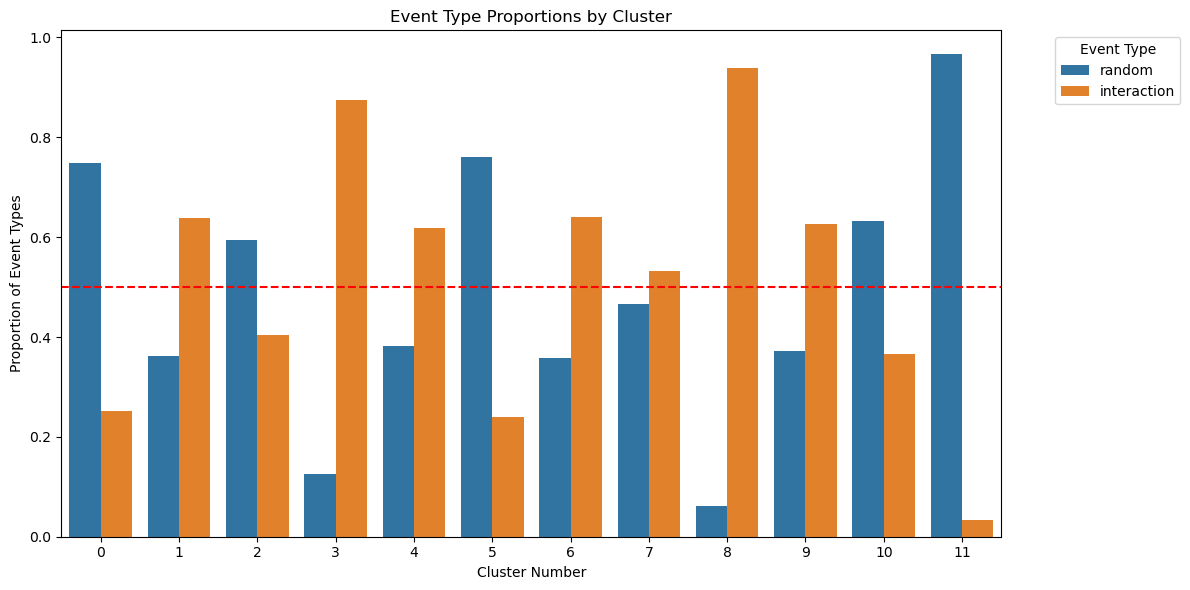

In [45]:
# Get unique clusters
unique_clusters = Umap["cluster"].unique()

# Initialize a DataFrame to store the proportions
proportions_df = pd.DataFrame()

# Process each cluster
for cluster_id in unique_clusters:
    cluster_data = Umap[Umap["cluster"] == cluster_id]
    
    # Count event types and calculate proportions
    event_counts = cluster_data["event_type"].value_counts(normalize=True).reset_index()
    event_counts.columns = ["event_type", "proportion"]
    event_counts["cluster"] = cluster_id
    
    # Append to the proportions DataFrame
    proportions_df = pd.concat([proportions_df, event_counts], ignore_index=True)

# Plot event type proportions as bar plots
plt.figure(figsize=(12, 6))
sns.barplot(data=proportions_df, x="cluster", y="proportion", hue="event_type")
plt.axhline(0.5, color='red', linestyle='--')
plt.title("Event Type Proportions by Cluster")
plt.xlabel("Cluster Number")
plt.ylabel("Proportion of Event Types")
plt.legend(title="Event Type", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Save the plot
plt.savefig(f"{output_dir}/event_type_proportions_by_cluster.png")
plt.show()
plt.close()

# Check clusters composition for ligh conditions

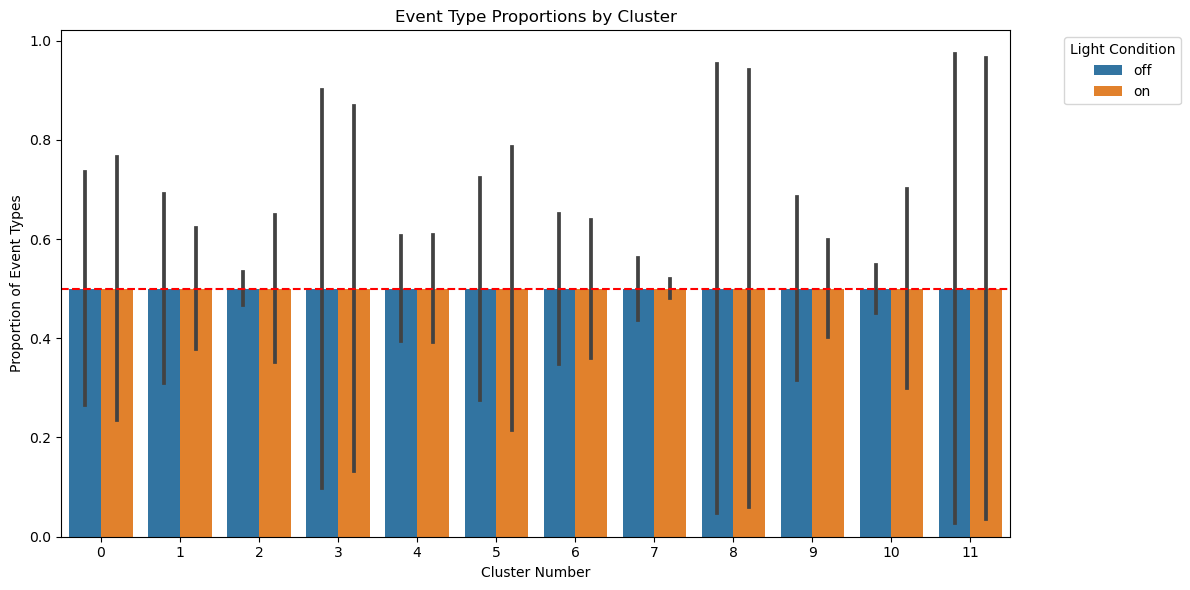

In [53]:
# With the Light subset, compare the event type proportions between light on and light off conditions

# Get unique clusters
unique_clusters = Umap_light["cluster"].unique()

# Initialize a DataFrame to store the proportions
proportions_df_Light = pd.DataFrame()

# Process each cluster
for cluster_id in unique_clusters:
    cluster_data = Umap_light[Umap_light["cluster"] == cluster_id]

    # Count event types and calculate proportions
    event_counts = (
        cluster_data.groupby("Light")["event_type"]
        .value_counts(normalize=True)
        .reset_index(name="proportion")
    )
    event_counts["cluster"] = cluster_id

    # Append to the proportions DataFrame
    proportions_df_Light = pd.concat(
        [proportions_df_Light, event_counts], ignore_index=True
    )

# Plot event type proportions as bar plots
plt.figure(figsize=(12, 6))
sns.barplot(data=proportions_df_Light, x="cluster", y="proportion", hue="Light")
plt.axhline(0.5, color="red", linestyle="--")
plt.title("Event Type Proportions by Cluster")
plt.xlabel("Cluster Number")
plt.ylabel("Proportion of Event Types")
plt.legend(title="Light Condition", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()

# Save the plot
# plt.savefig(f"{output_dir}/event_type_proportions_by_cluster.png")
plt.show()
plt.close()

# Individual features plotting

Let's check which features might be dominant in pulling apart the events

In [65]:
# Load the transformed data 

Transformed = pd.read_feather("/mnt/upramdya_data/MD/MultiMazeRecorder/Datasets/250220_StdContacts_Ctrl_Data/Transformed/230704_FeedingState_1_AM_Videos_Tracked_standardized_contacts_Transformed.feather")

In [66]:
Transformed["unique_id"] = Transformed["fly"].astype(str) + "_" + Transformed["event_type"] + "_" + Transformed["event_id"].astype(str)

In [67]:
# Get one cluster and the corresponding transformed data

cluster_0 = Umap[Umap["cluster"] == 0]

cluster_0_transformed = Transformed[Transformed["unique_id"].isin(cluster_0["unique_id"])]
cluster_0_transformed.head()

,duration,fly,event_type,start,end,start_frame,end_frame,random_Lfront_frame0_velocity,random_Lfront_frame0_angle,random_Lfront_frame1_velocity,...,interaction_centre_preprocessed_frame31_x,interaction_centre_preprocessed_frame32_x,interaction_centre_preprocessed_frame33_x,interaction_centre_preprocessed_frame34_x,interaction_centre_preprocessed_frame35_x,interaction_centre_preprocessed_frame36_x,interaction_centre_preprocessed_frame37_x,interaction_centre_preprocessed_frame38_x,interaction_centre_preprocessed_frame39_x,unique_id
5,40,230704_FeedingState_1_AM_Videos_Tracked_arena1...,interaction,217.482759,218.827586,6307,6346,NaN,NaN,NaN,...,-6.878956,-6.904913,-6.864255,-6.865701,-6.896346,-6.883292,-6.873660,-6.894672,-6.807396,230704_FeedingState_1_AM_Videos_Tracked_arena1...
20,40,230704_FeedingState_1_AM_Videos_Tracked_arena1...,interaction,792.310345,793.655172,22977,23016,NaN,NaN,NaN,...,-5.924924,-5.929246,-5.940658,-5.923656,-5.934064,-5.928786,-5.915951,-5.924174,-5.916111,230704_FeedingState_1_AM_Videos_Tracked_arena1...
22,40,230704_FeedingState_1_AM_Videos_Tracked_arena1...,interaction,894.724138,896.068966,25947,25986,NaN,NaN,NaN,...,-5.525082,-5.513773,-7.764350,-7.784685,-7.742791,-7.732795,-5.416684,-5.418823,-5.397428,230704_FeedingState_1_AM_Videos_Tracked_arena1...
24,40,230704_FeedingState_1_AM_Videos_Tracked_arena1...,interaction,929.689655,931.034483,26961,27000,NaN,NaN,NaN,...,-8.311730,-8.344927,-8.328278,-8.355102,-8.353104,-8.362911,-8.331151,-8.346368,-8.393881,230704_FeedingState_1_AM_Videos_Tracked_arena1...
36,40,230704_FeedingState_1_AM_Videos_Tracked_arena1...,interaction,1215.482759,1216.827586,35249,35288,NaN,NaN,NaN,...,-7.667375,-3.463373,-6.325148,-3.474447,-3.481215,-3.477602,-3.475609,-3.471232,-3.479289,230704_FeedingState_1_AM_Videos_Tracked_arena1...


In [68]:
# Replace Nans with 9999

cluster_0_transformed = cluster_0_transformed.fillna(9999)

In [69]:
# Get the list of features

feature_groups=['tracking', 'frame']

# Feature selection configuration
feature_config = {
    'tracking': [r'_frame\d+_x$', r'_frame\d+_y$'],
    'frame': [r'_frame\d+_velocity$', r'_frame\d+_angle$']
}


print("Excluding ball features...")

# Remove features that have "centre" in their name
feature_config['tracking'] = [f for f in feature_config['tracking'] if 'centre' not in f]
feature_config['frame'] = [f for f in feature_config['frame'] if 'centre' not in f]

# Create combined regex pattern
regex_parts = []
for group in feature_groups:
    regex_parts.extend(feature_config.get(group, []))
feature_pattern = '|'.join(regex_parts)

# Extract features and metadata
feature_columns = cluster_0_transformed.filter(regex=feature_pattern).columns
if len(feature_columns) == 0:
    raise ValueError("No features found matching the selected feature groups")
    
features = cluster_0_transformed[feature_columns].values
event_indices = cluster_0_transformed['event_id'] if 'event_id' in cluster_0_transformed.columns else pd.Series([None]*len(cluster_0_transformed))
metadata = cluster_0_transformed.drop(columns=feature_columns).drop(columns=['event_id'], errors='ignore')

Excluding ball features...


In [81]:
x_fly_pattern = r"^x_.*_fly$"
y_fly_pattern = r"^y_.*_fly$"


In [83]:
# Now using cluster 0 interaction data we could plot each keypoint position over time, which are x_bodypart and y_bodypart columns in the interaction data
keypoints = cluster_0_interactions.filter(regex=f"{x_fly_pattern}|{y_fly_pattern}")
keypoints.head()

,x_Head_fly,x_Thorax_fly,x_Abdomen_fly,x_Rfront_fly,x_Lfront_fly,x_Rmid_fly,x_Lmid_fly,x_Rhind_fly,x_Lhind_fly,x_Rwing_fly,x_Lwing_fly,x_centre_preprocessed_fly
0,-0.763581,-0.0,-8.720948,-17.691500,-12.543766,-17.687169,NaN,-17.510428,NaN,-0.824861,NaN,-4.582003
1,-0.689637,-0.0,-8.618637,-17.584305,-8.883628,-17.705719,NaN,-17.452966,NaN,-0.891677,NaN,-4.673234
2,-0.589980,-0.0,-5.308100,-17.527547,-5.060493,-20.705143,NaN,-17.399299,NaN,-1.007814,NaN,-4.774636
3,-0.593619,-0.0,-8.605806,-17.481550,-5.416653,-20.694916,NaN,-17.425880,NaN,-1.031443,NaN,-4.793782
4,-4.127132,-0.0,-9.963511,-24.206355,-9.175971,-28.078798,NaN,-24.183140,NaN,-8.746646,NaN,-9.373704


In [84]:
# Add the adjusted frame column

keypoints["adjusted_frame"] = cluster_0_interactions["adjusted_frame"]

/tmp/ipykernel_346935/3964046213.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  keypoints["adjusted_frame"] = cluster_0_interactions["adjusted_frame"]


In [85]:
keypoints

,x_Head_fly,x_Thorax_fly,x_Abdomen_fly,x_Rfront_fly,x_Lfront_fly,x_Rmid_fly,x_Lmid_fly,x_Rhind_fly,x_Lhind_fly,x_Rwing_fly,x_Lwing_fly,x_centre_preprocessed_fly,adjusted_frame
0,-0.763581,-0.0,-8.720948,-17.691500,-12.543766,-17.687169,NaN,-17.510428,NaN,-0.824861,NaN,-4.582003,0
1,-0.689637,-0.0,-8.618637,-17.584305,-8.883628,-17.705719,NaN,-17.452966,NaN,-0.891677,NaN,-4.673234,1
2,-0.589980,-0.0,-5.308100,-17.527547,-5.060493,-20.705143,NaN,-17.399299,NaN,-1.007814,NaN,-4.774636,2
3,-0.593619,-0.0,-8.605806,-17.481550,-5.416653,-20.694916,NaN,-17.425880,NaN,-1.031443,NaN,-4.793782,3
4,-4.127132,-0.0,-9.963511,-24.206355,-9.175971,-28.078798,NaN,-24.183140,NaN,-8.746646,NaN,-9.373704,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
373571,0.169255,0.0,-8.347263,-15.477120,-11.783413,-16.007619,NaN,-16.141800,NaN,-7.506896,-7.352082,0.843834,35
373572,0.142990,0.0,-8.381286,-15.559491,-11.853660,-16.047792,NaN,-16.165553,NaN,-7.544013,-7.421633,0.836730,36
373573,0.153933,0.0,-8.336024,-15.475694,-11.764525,-15.988236,NaN,-16.123438,NaN,-7.460093,-7.288598,0.839248,37
373574,0.158309,0.0,-8.349603,-15.467518,-11.826868,-16.022019,NaN,-16.148141,NaN,-7.531351,-7.410414,0.842033,38


/home/matthias/miniconda3/envs/trackinganalysis/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/matthias/miniconda3/envs/trackinganalysis/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='adjusted_frame', ylabel='x_Lfront_fly'>

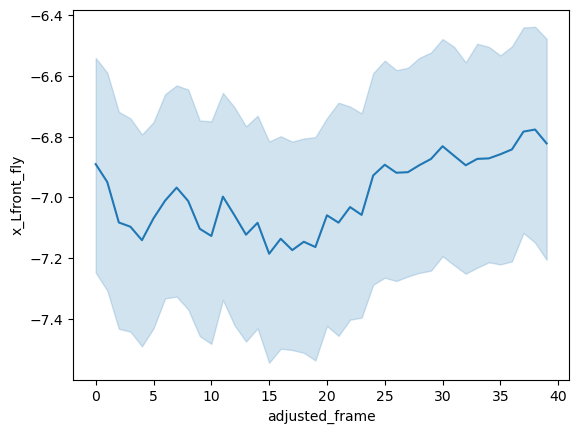

In [88]:
# Now for each column plot average value over adjusted_frame

# For instance, get the x_Abdomen_fly

sns.lineplot(data=keypoints, x="adjusted_frame", y="x_Lfront_fly", estimator="mean")